## Atividade Extra

Aluna: Maria Eduarda Alves da Silva

# Importando as bibliotecas

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np

# visualização
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# distância
from scipy.spatial import distance

from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster

In [2]:
# lendo o dataframe
df_jogadores = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2001/dados/players_match.csv')

In [3]:
df_jogadores.head()

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y
0,0,8.107316,13.362118,25.0,50.0,75,50
1,1,48.687401,80.312717,25.0,50.0,75,50
2,2,31.740322,64.865129,25.0,NaN,75,50
3,3,13.652919,81.462626,25.0,50.0,75,50
4,4,19.134233,28.985857,25.0,50.0,75,50


# Análise exploratória dos dados

In [4]:
df_jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         27 non-null     int64  
 1   Player_Position_X  22 non-null     float64
 2   Player_Position_Y  22 non-null     float64
 3   Center_Side_A_X    25 non-null     float64
 4   Center_Side_A_Y    24 non-null     float64
 5   Center_Side_B_X    27 non-null     int64  
 6   Center_Side_B_Y    27 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.6 KB


Observações:

1 - A tabela contém 27 linhas

2 - as colunas de Player_Position_X e Y e Center_Side_A_X e A_Y apresentam valores nulos

Informação complementar:

O futebol necessita de 11 jogadores em campo, para cada lado, totalizando 22.

In [5]:
df_jogadores.describe()

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y
count,27.000000,22.000000,22.000000,25.0,24.0,27.0,27.0
mean,8.703704,46.857088,59.683830,25.0,50.0,75.0,50.0
std,6.993485,30.210089,29.957657,0.0,0.0,0.0,0.0
min,0.000000,0.634923,2.736767,25.0,50.0,75.0,50.0
25%,2.000000,17.177874,34.161050,25.0,50.0,75.0,50.0
50%,8.000000,52.408227,65.598034,25.0,50.0,75.0,50.0
75%,14.500000,74.111067,81.175149,25.0,50.0,75.0,50.0
max,21.000000,96.355293,97.194354,25.0,50.0,75.0,50.0


observações:

1 - A coluna Unnamed: 0 pode ser interpretada como uma "label" referente ao posicionamento dos jogadores em campo

2 - A escala entre os valores do posicionamento e o centro de cada lado não é tão discrepante pois estão variando entre 0 a 97 ( posicionamento dos jogadores ) e 50 e 75 ( centro de cada lado )

## valores nulos

In [6]:
df_jogadores.isnull().sum()

Unnamed: 0           0
Player_Position_X    5
Player_Position_Y    5
Center_Side_A_X      2
Center_Side_A_Y      3
Center_Side_B_X      0
Center_Side_B_Y      0
dtype: int64

In [7]:
df_jogadores[df_jogadores['Player_Position_X'].isnull()]

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y
11,0,NaN,NaN,25.0,50.0,75,50
12,1,NaN,NaN,25.0,50.0,75,50
24,0,NaN,NaN,25.0,50.0,75,50
25,1,NaN,NaN,25.0,50.0,75,50
26,2,NaN,NaN,25.0,NaN,75,50


Observação:

1 - É possível verificar que para a coluna de Unnamed: 0 temos o mesmo valor se repetindo.

2 - Existem linhas sem posicionamento dos jogadores, logo serão retiradas do dataframe

In [8]:
# retirando os valores sem posicionamento
df_jogadores.dropna(subset=['Player_Position_X', 'Player_Position_Y'],inplace=True)

## valores duplicados

In [9]:
df_jogadores.duplicated().sum()

np.int64(0)

não há valores duplicados

In [10]:
df_jogadores

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y
0,0,8.107316,13.362118,25.0,50.0,75,50
1,1,48.687401,80.312717,25.0,50.0,75,50
2,2,31.740322,64.865129,25.0,NaN,75,50
3,3,13.652919,81.462626,25.0,50.0,75,50
4,4,19.134233,28.985857,25.0,50.0,75,50
5,5,16.793206,97.194354,NaN,50.0,75,50
6,6,18.269684,56.269861,25.0,50.0,75,50
7,7,14.532925,18.316240,25.0,50.0,75,50
8,8,16.813938,78.656237,25.0,50.0,75,50
9,9,37.347460,2.736767,25.0,50.0,75,50


# visualização da posição dos jogadores em campo

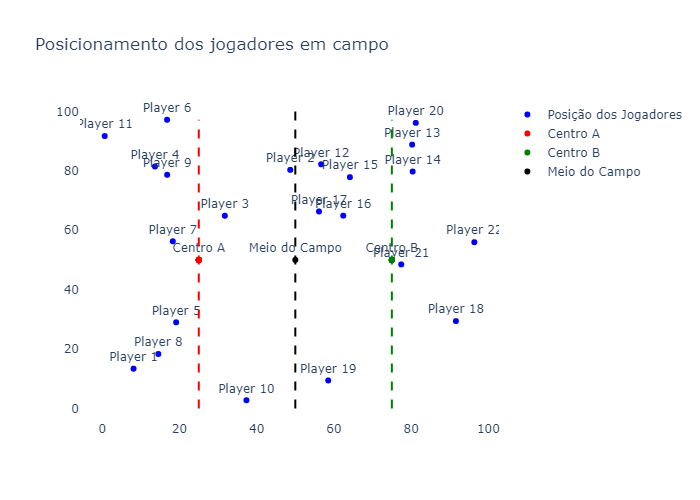

In [11]:
# Create the figure
fig = go.Figure()

# Add the first scatter plot (blue dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Player_Position_X'],
    y=df_jogadores['Player_Position_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Posição dos Jogadores',
    marker=dict(color='blue'),
    text=[f"Player {i+1}" for i in df_jogadores['Unnamed: 0']],  # Labels for each point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_A_X'],
    y=df_jogadores['Center_Side_A_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro A',
    marker=dict(color='red'),
    text=['Centro A'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the third scatter plot (green dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_B_X'],
    y=df_jogadores['Center_Side_B_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro B',
    marker=dict(color='green'),
    text=['Centro B'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=np.array(50),
    y=np.array(50),
    mode='markers+text',  # Use markers and add text labels
    name='Meio do Campo',
    marker=dict(color='black'),
    text=['Meio do Campo'],  # Label for this point
    textposition='top center'  # Position of the text
))


# Add vertical lines at Center_Side_A_X and Center_Side_B_X
fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_A_X'][0],  # X position for Center A
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_A_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="red", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_B_X'][0],  # X position for Center B
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_B_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="green", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=50,  # X position for Center B
        y0=0,  # Starting y position
        x1=50,  # Same x position for the vertical line
        y1=100,  # Ending y position
        line=dict(color="black", dash="dash")  # Line color and style
    )
)

# Add title to the plot
fig.update_layout(title="Posicionamento dos jogadores em campo")

# Remove background color (make transparent)
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the plot area
    paper_bgcolor='rgba(0, 0, 0, 0)'  # Transparent background for the whole figure
)

# Show the figure
fig.show("png")


Observações:

1 - Podemos visualizar a divisão dos jogadores de acordo com cada centro de seus respectivos lados. Sendo assim, é **esperado** que:


*   TIME A seja composto pelos jogadores 1 ao 11
*   TIME B seja composto pelos jogadores 12 ao 22

2 - Os jogadores não estão ultrapassando o meio de campo, logo cada um está no seu respectivo lado




# Calculando a distância entre os jogadores

Nosso objetivo é calcular as distâncias entre os jogadores e os centros e, com base nessas distâncias, determinar a equipe a que cada jogador pertence.

vamos testar os 3 tipos de distância abaixo


*   euclidiana
*   manhattan
*   chebyshev




In [12]:
# criando as tuplas que obtém o ponto x e y de cada jogador
pos_players = []

for x,y in zip(df_jogadores['Player_Position_X'],df_jogadores['Player_Position_Y']):
  pos_players.append((x,y))

# criando a lista com os valores dos centros
pos_center = [(25,50),(75,50)]

In [13]:
def calcula_dist_centro_A(x,y):
  dist_euclidiana = [distance.euclidean(i,y) for i in x]
  dist_manhattan = [distance.cityblock(i,y) for i in x]
  dist_chebyshev = [distance.chebyshev(i,y) for i in x]

  return dist_euclidiana,dist_manhattan,dist_chebyshev

def calcula_dist_centro_B(x,y):
  dist_euclidiana = [distance.euclidean(i,y) for i in x]
  dist_manhattan = [distance.cityblock(i,y) for i in x]
  dist_chebyshev = [distance.chebyshev(i,y) for i in x]

  return dist_euclidiana,dist_manhattan,dist_chebyshev

# aplicando os valores das funções
dist_e_ca, dist_m_ca, dist_c_ca = calcula_dist_centro_A(pos_players,pos_center[0])
dist_e_cb, dist_m_cb, dist_c_cb = calcula_dist_centro_B(pos_players,pos_center[1])

# Agrupar os jogadores por meio da distância

In [14]:
# considerando que a coluna de Unnamed: 0 define a label da posição do jogador então iremos criar uma coluna de label por jogador
labels = [f"Jogador {i+1}" for i in df_jogadores['Unnamed: 0']]
df_jogadores['Label_Jogador']= labels

In [15]:
df_jogadores.head()

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y,Label_Jogador
0,0,8.107316,13.362118,25.0,50.0,75,50,Jogador 1
1,1,48.687401,80.312717,25.0,50.0,75,50,Jogador 2
2,2,31.740322,64.865129,25.0,NaN,75,50,Jogador 3
3,3,13.652919,81.462626,25.0,50.0,75,50,Jogador 4
4,4,19.134233,28.985857,25.0,50.0,75,50,Jogador 5


## distância euclidiana

In [16]:
# adicionando a coluna do resultado da distancia euclidiana
df_jogadores['Distancia_euclidiana_ca'] = dist_e_ca
df_jogadores['Distancia_euclidiana_cb'] = dist_e_cb

In [17]:
df_jogadores.head()

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y,Label_Jogador,Distancia_euclidiana_ca,Distancia_euclidiana_cb
0,0,8.107316,13.362118,25.0,50.0,75,50,Jogador 1,40.344729,76.269034
1,1,48.687401,80.312717,25.0,50.0,75,50,Jogador 2,38.470167,40.139927
2,2,31.740322,64.865129,25.0,NaN,75,50,Jogador 3,16.321887,45.742451
3,3,13.652919,81.462626,25.0,50.0,75,50,Jogador 4,33.446271,68.944624
4,4,19.134233,28.985857,25.0,50.0,75,50,Jogador 5,21.817457,59.687337


In [18]:
# criando os grupos de acordo com a distância
def grupo_dist_euclidiana(df):
  if df['Distancia_euclidiana_ca'] < df['Distancia_euclidiana_cb']:
    return 'Time A'
  else:
    return 'Time B'

df_jogadores['Grupo_dist_euclidiana'] = df_jogadores.apply(grupo_dist_euclidiana,axis=1)

In [19]:
df_jogadores.groupby(['Grupo_dist_euclidiana','Label_Jogador'])['Grupo_dist_euclidiana'].count()

Grupo_dist_euclidiana  Label_Jogador
Time A                 Jogador 1        1
                       Jogador 10       1
                       Jogador 11       1
                       Jogador 2        1
                       Jogador 3        1
                       Jogador 4        1
                       Jogador 5        1
                       Jogador 6        1
                       Jogador 7        1
                       Jogador 8        1
                       Jogador 9        1
Time B                 Jogador 12       1
                       Jogador 13       1
                       Jogador 14       1
                       Jogador 15       1
                       Jogador 16       1
                       Jogador 17       1
                       Jogador 18       1
                       Jogador 19       1
                       Jogador 20       1
                       Jogador 21       1
                       Jogador 22       1
Name: Grupo_dist_euclidiana, dtype: int

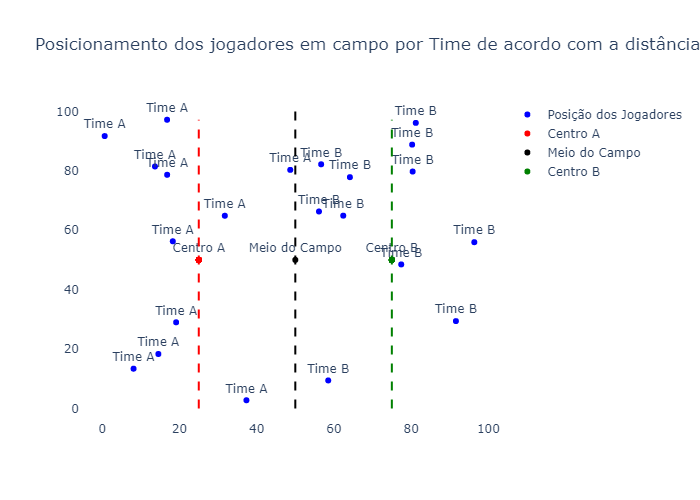

In [20]:
# visualizando os dados

# Create the figure
fig = go.Figure()

# Add the first scatter plot (blue dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Player_Position_X'],
    y=df_jogadores['Player_Position_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Posição dos Jogadores',
    marker=dict(color='blue'),
    text=[f"{i}" for i in df_jogadores['Grupo_dist_euclidiana']],  # Labels for each point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_A_X'],
    y=df_jogadores['Center_Side_A_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro A',
    marker=dict(color='red'),
    text=['Centro A'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=np.array(50),
    y=np.array(50),
    mode='markers+text',  # Use markers and add text labels
    name='Meio do Campo',
    marker=dict(color='black'),
    text=['Meio do Campo'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the third scatter plot (green dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_B_X'],
    y=df_jogadores['Center_Side_B_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro B',
    marker=dict(color='green'),
    text=['Centro B'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add vertical lines at Center_Side_A_X and Center_Side_B_X
fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_A_X'][0],  # X position for Center A
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_A_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="red", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_B_X'][0],  # X position for Center B
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_B_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="green", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=50,  # X position for Center B
        y0=0,  # Starting y position
        x1=50,  # Same x position for the vertical line
        y1=100,  # Ending y position
        line=dict(color="black", dash="dash")  # Line color and style
    )
)



# Add title to the plot
fig.update_layout(title="Posicionamento dos jogadores em campo por Time de acordo com a distância euclidiana")

# Remove background color (make transparent)
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the plot area
    paper_bgcolor='rgba(0, 0, 0, 0)'  # Transparent background for the whole figure
)

# Show the figure
fig.show("png")


## distância manhattan

In [21]:
# adicionando a coluna do resultado da distancia manhattan
df_jogadores['Distancia_manhattan_ca'] = dist_m_ca
df_jogadores['Distancia_manhattan_cb'] = dist_m_cb

In [22]:
# criando os grupos de acordo com a distância
def grupo_dist_manhattan(df):
  if df['Distancia_manhattan_ca'] < df['Distancia_manhattan_cb']:
    return 'Time A'
  else:
    return 'Time B'

df_jogadores['Grupo_dist_manhattan'] = df_jogadores.apply(grupo_dist_manhattan,axis=1)

In [23]:
df_jogadores.groupby(['Grupo_dist_manhattan','Label_Jogador'])['Grupo_dist_manhattan'].count()

Grupo_dist_manhattan  Label_Jogador
Time A                Jogador 1        1
                      Jogador 10       1
                      Jogador 11       1
                      Jogador 2        1
                      Jogador 3        1
                      Jogador 4        1
                      Jogador 5        1
                      Jogador 6        1
                      Jogador 7        1
                      Jogador 8        1
                      Jogador 9        1
Time B                Jogador 12       1
                      Jogador 13       1
                      Jogador 14       1
                      Jogador 15       1
                      Jogador 16       1
                      Jogador 17       1
                      Jogador 18       1
                      Jogador 19       1
                      Jogador 20       1
                      Jogador 21       1
                      Jogador 22       1
Name: Grupo_dist_manhattan, dtype: int64

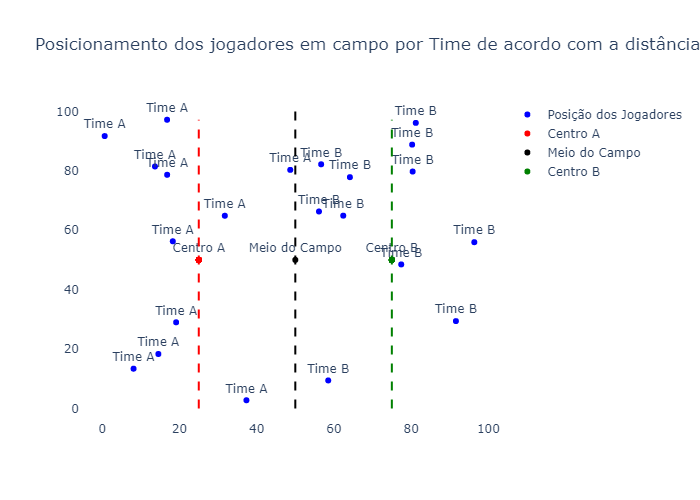

In [24]:
# visualizando os dados

# Create the figure
fig = go.Figure()

# Add the first scatter plot (blue dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Player_Position_X'],
    y=df_jogadores['Player_Position_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Posição dos Jogadores',
    marker=dict(color='blue'),
    text=[f"{i}" for i in df_jogadores['Grupo_dist_manhattan']],  # Labels for each point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_A_X'],
    y=df_jogadores['Center_Side_A_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro A',
    marker=dict(color='red'),
    text=['Centro A'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=np.array(50),
    y=np.array(50),
    mode='markers+text',  # Use markers and add text labels
    name='Meio do Campo',
    marker=dict(color='black'),
    text=['Meio do Campo'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the third scatter plot (green dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_B_X'],
    y=df_jogadores['Center_Side_B_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro B',
    marker=dict(color='green'),
    text=['Centro B'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add vertical lines at Center_Side_A_X and Center_Side_B_X
fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_A_X'][0],  # X position for Center A
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_A_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="red", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_B_X'][0],  # X position for Center B
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_B_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="green", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=50,  # X position for Center B
        y0=0,  # Starting y position
        x1=50,  # Same x position for the vertical line
        y1=100,  # Ending y position
        line=dict(color="black", dash="dash")  # Line color and style
    )
)



# Add title to the plot
fig.update_layout(title="Posicionamento dos jogadores em campo por Time de acordo com a distância manhattan")

# Remove background color (make transparent)
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the plot area
    paper_bgcolor='rgba(0, 0, 0, 0)'  # Transparent background for the whole figure
)

# Show the figure
fig.show("png")


## distância chebyshev

In [25]:
# adicionando a coluna do resultado da distancia chebyshev
df_jogadores['Distancia_cheb_ca'] = dist_c_ca
df_jogadores['Distancia_cheb_cb'] = dist_c_cb

In [26]:
# criando os grupos de acordo com a distância
def grupo_dist_cheb(df):
  if df['Distancia_cheb_ca'] < df['Distancia_cheb_cb']:
    return 'Time A'
  else:
    return 'Time B'

df_jogadores['Grupo_dist_cheb'] = df_jogadores.apply(grupo_dist_cheb,axis=1)

In [27]:
df_jogadores.groupby(['Grupo_dist_cheb','Label_Jogador'])['Grupo_dist_cheb'].count()

Grupo_dist_cheb  Label_Jogador
Time A           Jogador 1        1
                 Jogador 11       1
                 Jogador 3        1
                 Jogador 4        1
                 Jogador 5        1
                 Jogador 6        1
                 Jogador 7        1
                 Jogador 8        1
                 Jogador 9        1
Time B           Jogador 10       1
                 Jogador 12       1
                 Jogador 13       1
                 Jogador 14       1
                 Jogador 15       1
                 Jogador 16       1
                 Jogador 17       1
                 Jogador 18       1
                 Jogador 19       1
                 Jogador 2        1
                 Jogador 20       1
                 Jogador 21       1
                 Jogador 22       1
Name: Grupo_dist_cheb, dtype: int64

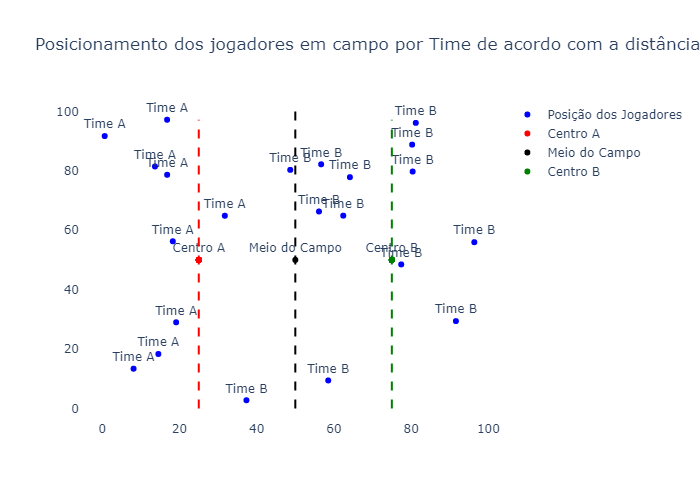

In [28]:
# visualizando os dados

# Create the figure
fig = go.Figure()

# Add the first scatter plot (blue dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Player_Position_X'],
    y=df_jogadores['Player_Position_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Posição dos Jogadores',
    marker=dict(color='blue'),
    text=[f"{i}" for i in df_jogadores['Grupo_dist_cheb']],  # Labels for each point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_A_X'],
    y=df_jogadores['Center_Side_A_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro A',
    marker=dict(color='red'),
    text=['Centro A'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the second scatter plot (red dots) with labels for each point
fig.add_trace(go.Scatter(
    x=np.array(50),
    y=np.array(50),
    mode='markers+text',  # Use markers and add text labels
    name='Meio do Campo',
    marker=dict(color='black'),
    text=['Meio do Campo'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add the third scatter plot (green dots) with labels for each point
fig.add_trace(go.Scatter(
    x=df_jogadores['Center_Side_B_X'],
    y=df_jogadores['Center_Side_B_Y'],
    mode='markers+text',  # Use markers and add text labels
    name='Centro B',
    marker=dict(color='green'),
    text=['Centro B'],  # Label for this point
    textposition='top center'  # Position of the text
))

# Add vertical lines at Center_Side_A_X and Center_Side_B_X
fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_A_X'][0],  # X position for Center A
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_A_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="red", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=df_jogadores['Center_Side_B_X'][0],  # X position for Center B
        y0=0,  # Starting y position
        x1=df_jogadores['Center_Side_B_X'][0],  # Same x position for the vertical line
        y1=max(df_jogadores['Player_Position_Y']),  # Ending y position
        line=dict(color="green", dash="dash")  # Line color and style
    )
)

fig.add_shape(
    go.layout.Shape(
        type="line",  # Type of shape is a line
        x0=50,  # X position for Center B
        y0=0,  # Starting y position
        x1=50,  # Same x position for the vertical line
        y1=100,  # Ending y position
        line=dict(color="black", dash="dash")  # Line color and style
    )
)



# Add title to the plot
fig.update_layout(title="Posicionamento dos jogadores em campo por Time de acordo com a distância chebyshev")

# Remove background color (make transparent)
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the plot area
    paper_bgcolor='rgba(0, 0, 0, 0)'  # Transparent background for the whole figure
)

# Show the figure
fig.show("png")


# Interpretações dos resultados

Para os grupos que são formados pela métrica da distância:

1 - Ao aplicar as métricas de distância euclidiana e manhattan obtivemos o mesmo resultado do agrupamento.

2 - Ao aplicar a métrica de distância chebyshev tivemos uma diferença de dois casos ( Jogador 2 e Jogador 10 ) por estarem mais distantes do **centro A**. Isto pode ter ocorrido pois esta métrica utiliza o maior valor da diferença encontrada entre os vetores.
   
   **De acordo com o chatgpt:**

  A distância de Chebyshev pode ser igual entre dois pontos distintos quando as diferenças nas coordenadas x e y forem iguais. Isso é esperado, pois a distância de Chebyshev calcula a maior diferença absoluta entre as coordenadas dos pontos.


In [29]:
df_jogadores[(df_jogadores['Label_Jogador'] == "Jogador 2") | (df_jogadores['Label_Jogador'] == "Jogador 10")]

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y,Label_Jogador,Distancia_euclidiana_ca,Distancia_euclidiana_cb,Grupo_dist_euclidiana,Distancia_manhattan_ca,Distancia_manhattan_cb,Grupo_dist_manhattan,Distancia_cheb_ca,Distancia_cheb_cb,Grupo_dist_cheb
1,1,48.687401,80.312717,25.0,50.0,75,50,Jogador 2,38.470167,40.139927,Time A,54.000118,56.625317,Time A,30.312717,30.312717,Time B
9,9,37.347460,2.736767,25.0,50.0,75,50,Jogador 10,48.849492,60.427865,Time A,59.610692,84.915773,Time A,47.263233,47.263233,Time B


In [30]:
def chebyshev_distance(point1, point2):
    return np.max(np.abs(np.array(point1) - np.array(point2)))

print(f"Cálculo manual de chebyshev para o centro A e jogador 2 -> {chebyshev_distance(pos_players[1],pos_center[0])}")
print(f"Cálculo manual de chebyshev para o centro B e jogador 2 -> {chebyshev_distance(pos_players[1],pos_center[1])}")

Cálculo manual de chebyshev para o centro A e jogador 2 -> 30.312717207402557
Cálculo manual de chebyshev para o centro B e jogador 2 -> 30.312717207402557


In [31]:
# calculo da diferença entre os dois pontos
print(f"Centro A -> {np.abs(np.array(pos_players[1]) - np.array(pos_center[0]))}") # centro A

print(f"Centro B -> {np.abs(np.array(pos_players[1]) - np.array(pos_center[1]))}") # centro B

Centro A -> [23.68740067 30.31271721]
Centro B -> [26.31259933 30.31271721]


Como sabemos que a distância de chebyshev seleciona a maior diferença absoluta, para os dois cálculos acima são encontrados o mesmo valor máximo. Este é o motivo deles estarem iguais e, consequentemente, terem sido agrupados de forma não esperada